In [5]:
import numpy as np
import corner
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d, RectBivariateSpline

In [6]:
#3flavor_poisson_IO, 3flavor_poisson_IO, nsi_poisson_1
target = 'nsi_poisson_1'

path = 'contour/' + target

nf = np.load(path + '/nf.npz')
cvae = np.load(path + '/cvae.npz')
bnn = np.load(path + '/bnn.npz')
dnn = np.load(path + '/dnn.npz')

nf_arr = nf['arr_0']
cvae_arr = cvae['arr_0']
bnn_arr = bnn['arr_0']
dnn_arr = dnn['arr_0']

In [7]:
if '3flavor_poisson' in target:
    if 'N' in target: file = open('../../Data/one_sigma_contour_DUNE_NO.dat')
    else: file = open('../../Data/one_sigma_contour_DUNE_IO.dat')
    theta23, delta, chi = [], [], []

    while True:
        array = [float(string) for string in file.readline().split()]
        if(len(array)>0):
            theta23.append(array[0])
            delta.append(array[1]) 
            chi.append(array[2])
        else:
            break
    file.close()

    theta23, delta, chi = np.array(theta23),  np.array(delta), np.array(chi)
    a = min(theta23)*100-300
    b = max(theta23)*100+300
    c = min(delta)*10-60
    d = max(delta)*10+60
    x = np.linspace(int(a), int(b), int(b - a + 1))/100
    y = np.linspace(int(c), int(d), int(d - c + 1))/10
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((len(X),len(X[0])))
    for i in range(len(theta23)):
        Z[np.where(Y == delta[i])[0][0]][np.where(X == theta23[i])[1][0]] = 1
else:
    a = np.loadtxt('../../Data/chi_theta23_delta_contour/chi_theta23_delta_v{}.dat'.format(target[-1]))
    arr = list(zip(*a))
    x0 = sorted(set(arr[0]))
    y0 = sorted(set(arr[1]))
    z0 = np.reshape(arr[2], (81, 37))
    f = RectBivariateSpline(x0, y0, z0)
    X = np.linspace(35, 55, 1000)
    Y = np.linspace(0, 360, 1000)
    znew = f(X, Y)
    one_sigma_region_boundary = np.where(znew < 5.99**2, 0, 1)
    Z = list(zip(*one_sigma_region_boundary))

/tmp/ipykernel_3722499/3189179094.py:15: UserWarning: No contour levels were found within the data range.
  CS_1_sigma = plt.contour(X, Y, Z, 0, colors='darkmagenta', linestyles='-', linewidths=1)


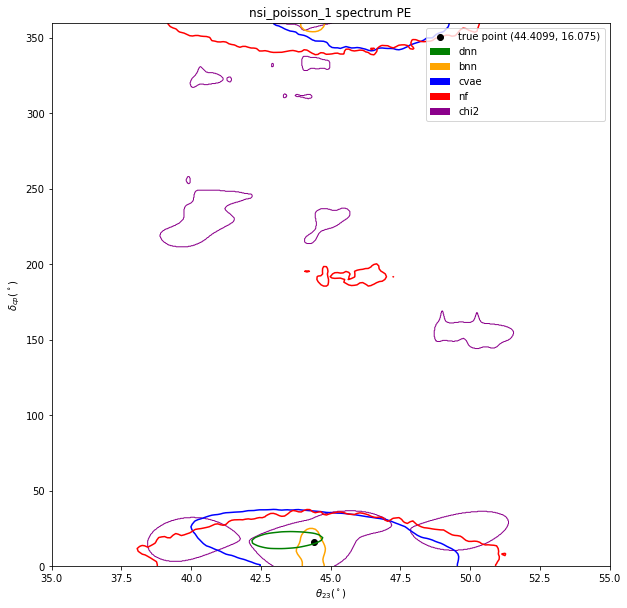

In [8]:
plt.figure(figsize=(10,10))

#Choose the range to observe.
if '3flavor_poisson' in target:
    #Draw the chi2 contour
    plt.contour(X, Y, Z, 0, colors='darkmagenta', linestyles='-', linewidths=1)
    if target =='N':
        plot_range = [[46,51], [150, 240]]
        true_theta23, true_delta = 49, 195
    else:
        plot_range = [[48,51.5], [240, 310]]
        true_theta23, true_delta = 49.3, 286

else:
    CS_1_sigma = plt.contour(X, Y, Z, 0, colors='darkmagenta', linestyles='-', linewidths=1)
    plot_range = [[35,55], [0, 360]]
    true_theta23, true_delta = 44.4099, 16.075

#Draw BNN contour.
bnn_delta = np.angle(bnn_arr[:, 2] + 1j*bnn_arr[:, 3], deg=True)
bnn_delta = np.where(bnn_delta > 0 , bnn_delta, bnn_delta+360)
corner.hist2d(bnn_arr[:, 1]*180/np.pi, bnn_delta,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='orange',
                    labels= ['$\\theta_{23} $($^\circ$)', '$\delta_{cp} $($^\circ$)'],
                    range=plot_range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={'fontsize': 30},
                    smooth=True
                   )

#Draw cVAE contour.
cvae_delta = np.angle(cvae_arr[:, 2] + 1j*cvae_arr[:, 3], deg=True)
cvae_delta = np.where(cvae_delta > 0 , cvae_delta, cvae_delta+360)
corner.hist2d(cvae_arr[:, 1]*180/np.pi, cvae_delta,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='blue',
                    labels= ['$\\theta_{23} $($^\circ$)', '$\delta_{cp} $($^\circ$)'],
                    range=plot_range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={'fontsize': 30},
                    smooth=True
                   )

#Draw nf contour.
nf_delta = np.angle(nf_arr[:, 2] + 1j*nf_arr[:, 3], deg=True)
nf_delta = np.where(nf_delta > 0 , nf_delta, nf_delta+360)
corner.hist2d(nf_arr[:, 1]*180/np.pi, nf_delta,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='red',
                    labels= ['$\\theta_{23} $($^\circ$)', '$\delta_{cp} $($^\circ$)'],
                    range=plot_range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={'fontsize': 30},
                    smooth=True
                   )

#Draw DNN contour.
dnn_delta = np.angle(dnn_arr[:, 2] + 1j*dnn_arr[:, 3], deg=True)
dnn_delta = np.where(dnn_delta > 0 , dnn_delta, dnn_delta+360)
corner.hist2d(dnn_arr[:, 1]*180/np.pi, dnn_delta,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='green',
                    labels= ['$\\theta_{23} $($^\circ$)', '$\delta_{cp} $($^\circ$)'],
                    range=plot_range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={'fontsize': 30},
                    smooth=True
                )
#Draw Chi2 contour.

proxy = [plt.Rectangle((2, 2), 0.0, 3, 90, fc=c) for c in ['green', 'orange', 'blue', 'red', 'darkmagenta']]
true_point = plt.scatter(true_theta23, true_delta, label = 'true point', c='k')
plt.legend([true_point] + proxy,
        ['true point ({}, {})'. format(true_theta23, true_delta), 'dnn', 'bnn', 'cvae', 'nf',  'chi2'])

plt.title(target + ' spectrum PE')

plt.xlabel('$\\theta_{23} $($^\circ$)')
plt.ylabel('$\delta_{cp} $($^\circ$)')
plt.savefig('contour_picture/{} spectrum PE'.format(target))
plt.show()